# XGBOOST Classification

In [1]:
# import the necessary libraries
import pandas as pd                                                                     # data manipulation and analysis
import numpy as np                                                                      # working with arrays
import seaborn as sns                                                                   # statistical graphs
import matplotlib.pyplot as plt                                                         # data visualization and graphical plotting library  

from xgboost import XGBClassifier                                                       # combines the predictions of multiple weak models to produce a stronger prediction
from sklearn.preprocessing import LabelEncoder                                          # encode the values so the model can interpret
from sklearn.model_selection import train_test_split                                    # split arrays or matrices into random train and test subsets.
from sklearn.model_selection import cross_val_score                                     # train and tests a model over multiple folds of the dataset                                      
from sklearn.metrics import confusion_matrix                                            # evaluate the performance of a classification model
from sklearn.metrics import accuracy_score                                              # set of labels predicted must match the corresponding set of labels in y_true
from sklearn.metrics import classification_report                                       # measure the quality of predictions from a classification algorithm 


In [2]:
# read the data to create a data frame
# taking the values from the excel file
# load in the data
breast_cancer_DF = pd.read_excel('../Data_Preprocesssing/Data_Preprocessing.xlsx',sheet_name='wdbc')

In [3]:
# find the shape
breast_cancer_DF.shape

(569, 32)

In [4]:
# output the first couple rows
breast_cancer_DF.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothnes1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothnes3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# summary of the data
breast_cancer_DF.describe()

,ID,radius1,texture1,perimeter1,area1,smoothnes1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothnes3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# check to see if there are any missing values
breast_cancer_DF.isnull()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothnes1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothnes3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# output in number notation for a better view
breast_cancer_DF.isnull().sum()

ID                    0
Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothnes1            0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothnes2            0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothnes3            0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

Based on the check, we do not have any missing values. 

In [8]:
# checking and comparing the different diagnosis
breast_cancer_DF['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

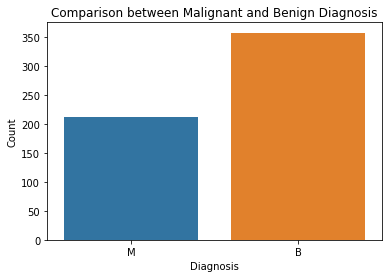

In [9]:
# graph using seaborn
sns.countplot(x=breast_cancer_DF["Diagnosis"])
plt.title("Comparison between Malignant and Benign Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

In [10]:
# now we want to create a dataset that takes in all other variables except the the ID number and Diagnosis
# for the x value, we will omit the ID and Diagnosis
# for the y value, we only want the Diagnosis
X = breast_cancer_DF.drop(['ID','Diagnosis'],axis=1)
Y = breast_cancer_DF['Diagnosis']

In [11]:
# create the model to train the data 
# for the random state, it could be any number, playing around with this can change the outcome
X_train, X_test, Y_train, y_test = train_test_split(X,Y,test_size=.2)

In [12]:
# create the model instance
clf = XGBClassifier(n_estimators=400, max_depth=2, learning_rate=1)

In [13]:
# due to some updates of XGboost and the way our code is written, we need to encode the y-variables for XGboost to read them 
le = LabelEncoder()                     
Y_train = le.fit_transform(Y_train)
y_test = le.fit_transform(y_test)

In [14]:
# fit the data of x and y train
clf.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [15]:
# computed as the mean and standard deviation of accumulation of the impurity decrease within each tree
clf.feature_importances_

array([2.0779655e-03, 1.6964169e-02, 0.0000000e+00, 0.0000000e+00,
       1.1532621e-02, 9.5873373e-03, 4.2434870e-03, 7.1314990e-04,
       3.8552590e-04, 1.6982715e-03, 0.0000000e+00, 9.9944661e-04,
       3.1996015e-02, 3.1556558e-02, 3.0218402e-04, 5.6903674e-03,
       4.1195396e-03, 4.3471620e-04, 4.3221554e-04, 3.9885957e-03,
       2.7148414e-01, 2.3302719e-02, 7.2791837e-02, 7.2279056e-03,
       1.7353131e-02, 0.0000000e+00, 1.7919105e-02, 4.6065158e-01,
       2.0870729e-03, 4.6020982e-04], dtype=float32)

In [16]:
# display the columns to match up with the important features
breast_cancer_DF.columns

Index(['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1',
       'smoothnes1', 'compactness1', 'concavity1', 'concave_points1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
       'area2', 'smoothnes2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothnes3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')

In [17]:
# make predictions for the y variable
y_pred = clf.predict(X_test)

In [18]:
# output the predictions
print(y_pred)

[1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1
 0 0 0]


In [19]:
# measure the performance of the classification model
confusion_matrix(y_test,y_pred)

array([[67,  1],
       [ 2, 44]], dtype=int64)

In [20]:
# testing the accuracy of our classification model
accuracy_score(y_test,y_pred)

0.9736842105263158

In [21]:
# cross checking with cross-validation
# this will check the accuracy up the total amount of cv
cross_val_score(clf,X_train,Y_train,cv = 10)

array([0.93478261, 0.93478261, 0.97826087, 0.95652174, 0.93478261,
       0.95555556, 0.97777778, 1.        , 0.93333333, 0.91111111])

In [22]:
# classification report to give a summary of our model
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        69
           1       0.96      0.98      0.97        45

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



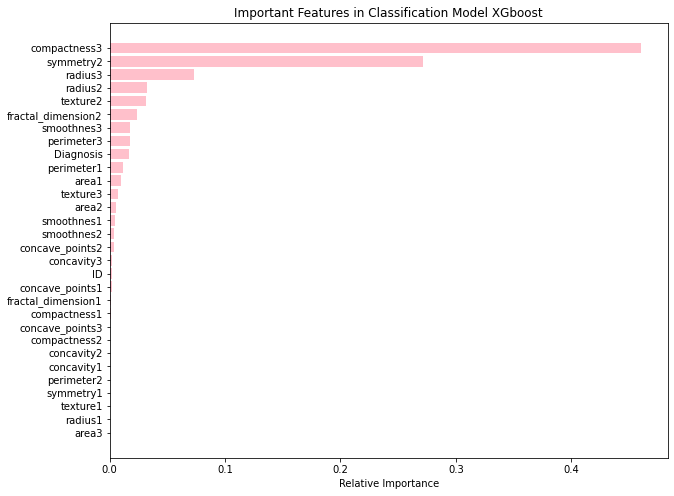

In [23]:
# create a graph showcasing which features are most relative in determining the diagnosis
features = breast_cancer_DF.columns
importance = clf.feature_importances_
indicies = np.argsort(importance)

# great graph labels
plt.rc('figure', figsize=(10, 8)) # resizing the graph for better visualization - this will apply to all graphs
plt.title("Important Features in Classification Model XGboost")
plt.xlabel("Relative Importance")
plt.barh(range(len(indicies)), importance[indicies],color = 'pink', align = 'center')
plt.yticks(range(len(indicies)), [features[x] for x in indicies])

plt.show()
